### Table of Contents:
* [1. Feature selection and improve accuracy of data mining results ](#1)
* &emsp;[1.1. Importing Libraries](#11)
* &emsp;[1.2. Converting categorical data to numerical](#12)
* &emsp;[1.3. Correlation Matrix](#13)
* &emsp;[1.4. Heat-Map of correlation Matrix](#14)
* &emsp;[1.5. Relevant attributes to improve the accuracy of data mining results](#15)

# 1. Feature selection and improve accuracy of data mining results <a class="anchor" id="1"></a>

Select relevant attributes from your dataset to improve the accuracy of data mining results. 

## 1.1. Importing Libraries <a class="anchor" id="11"></a>

In [1]:
import pandas as pd 
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt

## 1.2. Converting categorical data to numerical <a class="anchor" id="12"></a>

In [2]:
df = pd.read_csv('data/training_data.csv')

In [3]:
categorical_features = ['company','country','director','genre','rating','released','star','year',
                        'writer','original_title','overview','tagline','title','genres_edited',
                        'spoken_languages_edited','production_countries_edited']
continuous_features = ['budget','runtime','score','votes','popularity']
normalized_features = [e+'_norm' for e in continuous_features]
target_features = ['isprofit','profitability_ratio']
all_features = categorical_features + continuous_features + normalized_features + target_features

In [4]:
df['company']=df['company'].astype('category').cat.codes
df['country']=df['country'].astype('category').cat.codes
df['director']=df['director'].astype('category').cat.codes
df['genre']=df['genre'].astype('category').cat.codes
df['rating']=df['rating'].astype('category').cat.codes
df['star']=df['star'].astype('category').cat.codes
df['writer']=df['writer'].astype('category').cat.codes

## 1.3. Correlation Matrix <a class="anchor" id="13"></a>

In [5]:
corr_df=df[all_features].corr()

In [6]:
corr_df

,company,country,director,genre,rating,star,year,writer,budget,runtime,score,votes,popularity,budget_norm,runtime_norm,score_norm,votes_norm,popularity_norm,isprofit,profitability_ratio
company,1.000000,-0.012938,0.002346,-0.074377,-0.103844,0.018633,-0.016699,0.013394,0.093067,0.004868,-0.015268,0.013095,0.049055,0.093067,0.004868,-0.015268,0.013095,0.049055,0.021186,0.021449
country,-0.012938,1.000000,0.022567,-0.014175,0.019798,-0.042658,-0.081451,-0.015811,0.060587,-0.059856,-0.094436,0.004163,0.002100,0.060587,-0.059856,-0.094436,0.004163,0.002100,0.130571,0.156553
director,0.002346,0.022567,1.000000,0.062033,0.009015,0.057514,-0.001835,0.124777,-0.000978,0.065077,0.073383,0.056536,0.035445,-0.000978,0.065077,0.073383,0.056536,0.035445,-0.014086,0.013977
genre,-0.074377,-0.014175,0.062033,1.000000,0.139469,0.012105,0.021860,0.004368,-0.285234,0.032357,0.096274,-0.107307,-0.140125,-0.285234,0.032357,0.096274,-0.107307,-0.140125,0.026317,0.044542
rating,-0.103844,0.019798,0.009015,0.139469,1.000000,0.012454,-0.044631,-0.012443,-0.197102,0.188338,0.126715,0.069901,-0.043278,-0.197102,0.188338,0.126715,0.069901,-0.043278,-0.077240,-0.090356
star,0.018633,-0.042658,0.057514,0.012105,0.012454,1.000000,-0.011277,-0.000897,0.032475,0.059512,0.040870,0.018101,0.007411,0.032475,0.059512,0.040870,0.018101,0.007411,-0.019408,-0.016908
year,-0.016699,-0.081451,-0.001835,0.021860,-0.044631,-0.011277,1.000000,-0.002040,0.234016,-0.019349,0.019356,0.301075,0.213083,0.234016,-0.019349,0.019356,0.301075,0.213083,-0.056462,-0.120600
writer,0.013394,-0.015811,0.124777,0.004368,-0.012443,-0.000897,-0.002040,1.000000,-0.034652,-0.002420,0.028391,0.003408,-0.015689,-0.034652,-0.002420,0.028391,0.003408,-0.015689,-0.002924,0.033549
budget,0.093067,0.060587,-0.000978,-0.285234,-0.197102,0.032475,0.234016,-0.034652,1.000000,0.255738,-0.093279,0.383897,0.340347,1.000000,0.255738,-0.093279,0.383897,0.340347,-0.068024,-0.132659
runtime,0.004868,-0.059856,0.065077,0.032357,0.188338,0.059512,-0.019349,-0.002420,0.255738,1.000000,0.388298,0.207235,0.116976,0.255738,1.000000,0.388298,0.207235,0.116976,-0.035972,-0.043221


## 1.4. Heat-Map of correlation Matrix <a class="anchor" id="14"></a>

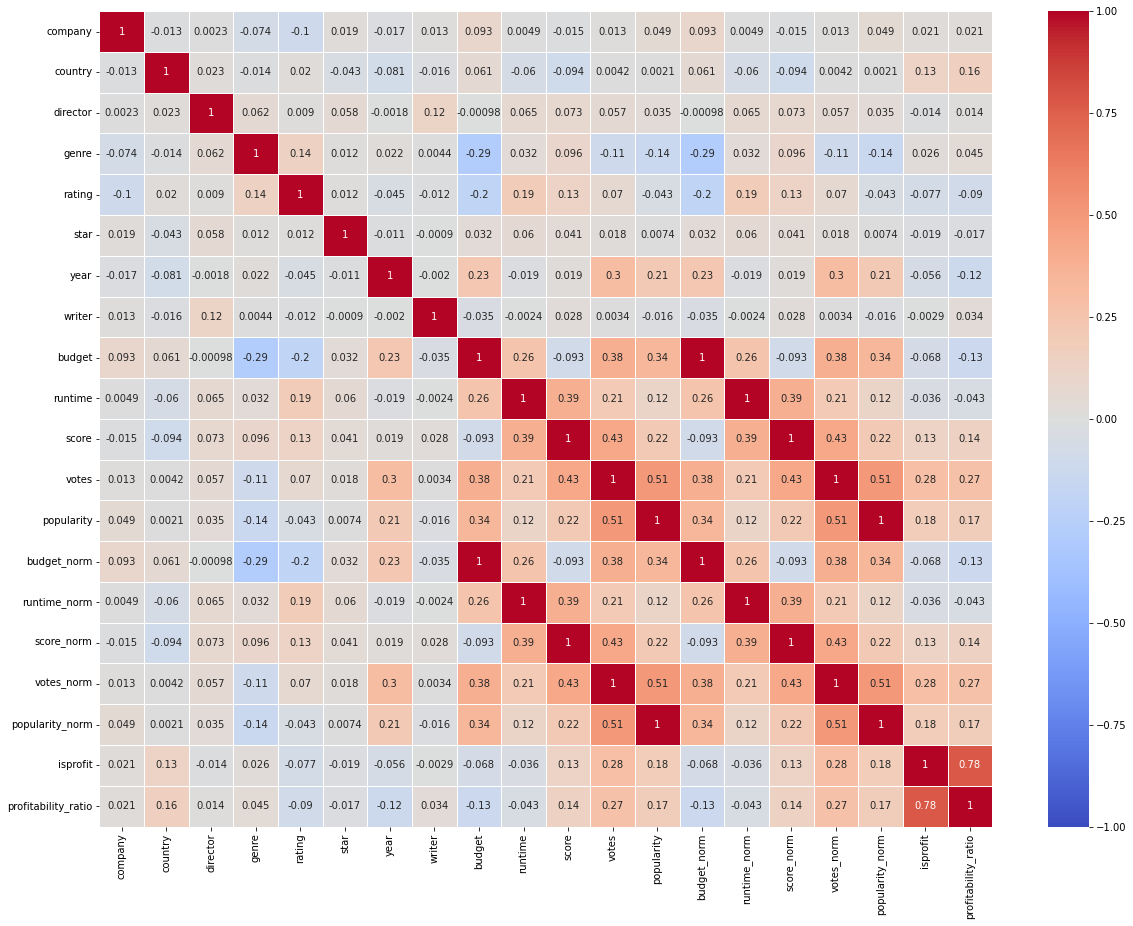

In [7]:
plt.figure(figsize=(20,15))
sns.heatmap(corr_df,cmap='coolwarm',vmin=-1, vmax=1,annot=True,linewidth=.5);


## 1.5. Relevant attributes to improve the accuracy of data mining results <a class="anchor" id="15"></a>

In [8]:
corr_df_features = set()
for i in range(len(corr_df.columns)-2):
    if corr_df.iloc[i,18]<-0.04 or corr_df.iloc[i,18]>0.04 or \
        corr_df.iloc[i,19]<-0.04 or corr_df.iloc[i,19]>0.04:
        corr_df_features.add(corr_df.columns[i])

In [9]:
corr_df_features

{'budget',
 'budget_norm',
 'country',
 'genre',
 'popularity',
 'popularity_norm',
 'rating',
 'runtime',
 'runtime_norm',
 'score',
 'score_norm',
 'votes',
 'votes_norm',
 'year'}

In [10]:
df[list(corr_df_features)+['isprofit','profitability_ratio']].to_csv('data/final_training_data.csv')

KeyError: "['ada-f1', 'rf-f1', 'gb-f1', 'k-f1'] not in index"